In [1]:
%load_ext autoreload

In [397]:
%autoreload 2

from hydra import compose, initialize
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sys
import torch
from tqdm.auto import tqdm

sys.path.append('..')
from data_utils import get_data_class, get_stability_run_list, load_session_data, load_window_from_chunks
from run_delase import main

In [39]:
# I think use the decorator instead of this in future !!
with initialize(version_base="1.3", config_path="../conf"):
    cfg = compose(config_name="config")

# Make Hydra Files

In [13]:
data_class = 'propofolPuffTone'
session_list = [f[:-4] for f in os.listdir(os.path.join(cfg.params.all_data_dir, data_class)) if f.endswith('.mat')]

In [38]:
for session in tqdm(session_list):
    file_path = f"/om2/user/eisenaj/code/ChaoticConsciousness/conf/session/{session}.yaml"

    if os.path.exists(file_path):
        print(f"File already exists for {session}! Skipping...")
    else:
        stability_run_list = get_stability_run_list(session, cfg.params.stability_results_dir, cfg.params.grid_search_results_dir, cfg.params.all_data_dir, T_pred=cfg.params.T_pred, stride=cfg.params.stride)
    
        my_str = ""
        my_str += f"session_name: {session}\n\n"
        my_str += "run_indices:\n"
        for area, area_list in stability_run_list.items():
            my_str += f"  {area}: {', '.join([str(i) for i in np.arange(len(area_list))])}\n"
        # Open a file in write mode ("w")
        with open(file_path, "w") as file:
            # Write some text to the file
            file.write(my_str)

  0%|          | 0/21 [00:00<?, ?it/s]

File already exists for MrJones-Anesthesia-20160125-01! Skipping...


# Running DeLASE

## Running

In [412]:
session = "Mary-Anesthesia-20160809-01"
area = 'vlPFC'

In [415]:
os.system(f"python /om2/user/eisenaj/code/ChaoticConsciousness/run_delase.py -m session={session} ++params.area={area}")

[2024-03-13 11:45:23,568][HYDRA] Submitit 'slurm' sweep output dir : multirun/2024-03-13/11-44-42
[2024-03-13 11:45:23,570][HYDRA] 	#0 : ++params.run_index=0 session=Mary-Anesthesia-20160809-01 ++params.area=vlPFC
[2024-03-13 11:45:23,575][HYDRA] 	#1 : ++params.run_index=1 session=Mary-Anesthesia-20160809-01 ++params.area=vlPFC
[2024-03-13 11:45:23,578][HYDRA] 	#2 : ++params.run_index=2 session=Mary-Anesthesia-20160809-01 ++params.area=vlPFC
[2024-03-13 11:45:23,582][HYDRA] 	#3 : ++params.run_index=3 session=Mary-Anesthesia-20160809-01 ++params.area=vlPFC
[2024-03-13 11:45:23,585][HYDRA] 	#4 : ++params.run_index=4 session=Mary-Anesthesia-20160809-01 ++params.area=vlPFC
[2024-03-13 11:45:23,589][HYDRA] 	#5 : ++params.run_index=5 session=Mary-Anesthesia-20160809-01 ++params.area=vlPFC
[2024-03-13 11:45:23,593][HYDRA] 	#6 : ++params.run_index=6 session=Mary-Anesthesia-20160809-01 ++params.area=vlPFC
[2024-03-13 11:45:23,596][HYDRA] 	#7 : ++params.run_index=7 session=Mary-Anesthesia-201608

Traceback (most recent call last):
  File "/om2/user/eisenaj/miniforge3/envs/communication-transformer/lib/python3.11/site-packages/hydra/_internal/utils.py", line 220, in run_and_report
    return func()
           ^^^^^^
  File "/om2/user/eisenaj/miniforge3/envs/communication-transformer/lib/python3.11/site-packages/hydra/_internal/utils.py", line 466, in <lambda>
    lambda: hydra.multirun(
            ^^^^^^^^^^^^^^^
  File "/om2/user/eisenaj/miniforge3/envs/communication-transformer/lib/python3.11/site-packages/hydra/_internal/hydra.py", line 162, in multirun
    ret = sweeper.sweep(arguments=task_overrides)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/om2/user/eisenaj/miniforge3/envs/communication-transformer/lib/python3.11/site-packages/hydra/_internal/core_plugins/basic_sweeper.py", line 177, in sweep
    results = self.launcher.launch(batch, initial_job_idx=initial_job_idx)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/om2/us

256

## Checking

In [403]:
stability_run_list = get_stability_run_list(session, cfg.params.stability_results_dir, cfg.params.grid_search_results_dir, cfg.params.all_data_dir, T_pred=cfg.params.T_pred, stride=cfg.params.stride)

In [405]:
normed_folder = 'NOT_NORMED' if not cfg.params.normed else 'NORMED'
save_dir = os.path.join(cfg.params.stability_results_dir, 'stability_results', session, normed_folder, f"SUBSAMPLE_{cfg.params.subsample}", area)

In [411]:
saved_files = os.listdir(save_dir)
indices_to_run = []
for run_index in range(len(stability_run_list)):
    filename = f"run_index-{run_index}.pkl"
    if filename not in saved_files:
        indices_to_run.append(run_index)

if len(indices_to_run) == 0:
    print(f"All results completed for {session} - {area}!!")

All results completed for Mary-Anesthesia-20160809-01 - all!!


# Collect Grid Results

In [54]:
example_dir = "/scratch2/weka/millerlab/eisenaj/ChaoticConsciousness/session_results/MrJones-Anesthesia-20160105-01/NOT_NORMED/all"
df_example = pd.read_pickle(os.path.join(example_dir, "0.0_window_15000_matrix_size_750"))

In [55]:
df_example

[{'window': 15000,
  'matrix_size': 750,
  'r': 900,
  'AIC': -10.65300866359266,
  'stability_params': array([-7.2954118e-01, -7.2954118e-01, -1.5610685e+00, ...,
         -2.0307860e+03, -2.0515034e+03, -2.0698794e+03], dtype=float32),
  'stability_freqs': array([-0.08549122,  0.08549122,  0.        , ...,  0.        ,
          0.        ,  0.        ], dtype=float32),
  'Js': tensor([[[ 9.4655e+02,  1.3476e+02,  4.7940e+01,  ..., -2.6560e+01,
            -5.7353e+01,  2.6203e+01],
           [ 1.8600e+01,  1.2615e+03,  4.3094e+01,  ...,  2.7032e+00,
             4.0517e+01,  1.4559e+01],
           [ 1.4516e+01,  6.9535e+01,  1.3066e+03,  ...,  1.8237e+00,
            -4.5057e+01, -3.3412e+01],
           ...,
           [-4.1992e+00, -6.9386e+00,  9.7876e+00,  ...,  1.2642e+03,
            -2.5180e+01, -2.9289e+01],
           [-1.8906e+00, -6.2553e+00,  3.9942e+00,  ...,  3.1917e+01,
             1.1779e+03,  6.7871e+01],
           [-1.7255e+00, -1.4932e+00,  2.7641e+00,  ...,  

In [ ]:
run_params

# Arguments + Parameters

In [3]:
data_processing_args_dir = "/scratch2/weka/millerlab/eisenaj/ChaoticConsciousness/data_processing_args"
data_save_dir = '/scratch2/weka/millerlab/eisenaj/ChaoticConsciousness/figure_data'

# Batch Queue

In [4]:
mp_args = dict(
    # ----------------------
    # MULTIPROCESSING ARGUMENTS
    # ----------------------
    USE_TORCH=True,
    USE_CUDA=False,
    DTYPE='torch.DoubleTensor',
    NUM_WORKERS=20,
#     NUM_WORKERS=4,
    USE_LOGGING=True,
    LOG_DIR="/om2/user/eisenaj/code/shell_scripts/DeLASE",
    LOG_NAME='mp_delase',
    LOG_LEVEL=logging.DEBUG,
    RESULTS_DIR='/scratch2/weka/millerlab/eisenaj/ChaoticConsciousness/performance_results_VAR',
    
    COMPUTE_IP=True,
    COMPUTE_CHROOTS=False,
    SAVE_JACOBIANS=False,
    TRACK_RESEEDS=True,
    NORM = False,
    NORM_AIC=True,
    
    QUEUE_FULL_SESSION=True,

    # ----------------------
    # DYNAMICAL SYSTEMS ARGUMENTS
    # ----------------------
    parameter_grid=ParameterGrid(
                        window_vals=np.array([15000]),
                        matrix_size_vals=np.array([750]),
                        r_vals=np.array([750]),
                        reseed=True,
                        reseed_vals=np.array([1, 5, 10, 15, 20, 30, 40, 50, 100, 150, 200, 250, 300, 400, 500, 750, 1000])
                    ),
    T_pred=15000, # time steps
    dt = 0.001, # s
    integrated_performance_kwargs = dict(
        metrics=['autocorrel_correl', 'fft_correl', 'fft_r2'], 
        weights='equal',
        num_lags=500,
        max_freq=200,
        fft_n=1000,
    ),
#     integrated_performance_kwargs = {},
    stability_max_freq = 500,
    stability_max_unstable_freq = 125,
    
)
mp_args = argparse.Namespace(**mp_args)

In [13]:
# session_list = [
#     'MrJones-Anesthesia-20160113-01',
#     'Mary-Anesthesia-20160809-01',
#     'MrJones-Anesthesia-20160105-01',
#     'Mary-Anesthesia-20160818-02',
#     'MrJones-Anesthesia-20160121-01',
#     'Mary-Anesthesia-20160831-02',
#     'MrJones-Anesthesia-20160123-01'
# ]

# session_list = [
#     'Mary-Anesthesia-20160902-02',
#     'Mary-Anesthesia-20160908-02',
#     'Mary-Anesthesia-20160914-02',
#     'Mary-Anesthesia-20160916-02',

#     'MrJones-Anesthesia-20160125-01',
#     'MrJones-Anesthesia-20160201-01',
#     'MrJones-Anesthesia-20160206-01',
#     'MrJones-Anesthesia-20160210-01',
#     'MrJones-Anesthesia-20160301-01'
# ]

session_list = os.listdir("/scratch2/weka/millerlab/eisenaj/ChaoticConsciousness/grid_search_results")

In [14]:
session_list = session_list[:2]
# session_list = session_list[4:]

In [15]:
session_list

['Mary-Anesthesia-20160908-02', 'MrJones-Anesthesia-20160301-01']

# Other

In [16]:
# device = 'cuda'
# norm_folder = "NOT_NORMED" if not mp_args.NORM else "NORMED"
# for session in tqdm(session_list):
#     print("-"*30)
#     print(f'SESSION = {session}')
#     print("-"*30)
#     # -----------------------------------------
#     # LOAD DATA AND DIRECTORY
#     # -----------------------------------------
#     print("loading data...")
#     all_data_dir = '/scratch2/weka/millerlab/eisenaj/datasets/anesthesia/mat'
#     data_class = get_data_class(session, all_data_dir)

#     os.environ["HDF5_USE_FILE_LOCKING"] = "FALSE"
#     # variables = ['electrodeInfo', 'lfp', 'lfpSchema', 'sessionInfo', 'trialInfo', 'unitInfo']
#     # session_vars, T, N, dt = load_session_data(session, all_data_dir, variables, data_class=data_class, verbose=False)
#     # electrode_info, lfp, lfp_schema, session_info, trial_info, unit_info = session_vars['electrodeInfo'], session_vars['lfp'], session_vars['lfpSchema'], session_vars['sessionInfo'], session_vars['trialInfo'], session_vars['unitInfo']

#     variables = ['electrodeInfo', 'lfpSchema', 'sessionInfo', 'trialInfo', 'unitInfo']
#     session_vars, T, N, dt = load_session_data(session, all_data_dir, variables, data_class=data_class, verbose=False)
#     electrode_info, lfp_schema, session_info, trial_info, unit_info = session_vars['electrodeInfo'], session_vars['lfpSchema'], session_vars['sessionInfo'], session_vars['trialInfo'], session_vars['unitInfo']

#     eyes_close = session_info['eyesClose'][-1] if isinstance(session_info['eyesClose'], np.ndarray) else session_info['eyesClose'] 
#     section_times = dict( 
#             pre=(0, session_info['drugStart'][0]),
#             induction=(session_info['drugStart'][0], eyes_close),
#             during=(eyes_close, session_info['drugEnd'][1]),
#             post=(session_info['drugEnd'][1], T*dt)
#     )
#     sections = list(section_times.keys())
# #     areas = np.unique(electrode_info['area'])
#     # areas = np.hstack([areas, 'all'])
#     areas = ['all']
    
#     print("data loaded!")
#     print("loading directory")
    
#     chunked_folder = [f for f in os.listdir(os.path.join(all_data_dir, data_class)) if f.startswith(session) and 'chunked' in f]
#     if len(chunked_folder) == 0:
#         print(f"Chunked folder for {session} not found in {os.path.join(all_data_dir, data_class)}")
#     else:
#         chunked_folder = chunked_folder[0]

#     directory = pd.read_pickle(os.path.join(all_data_dir, data_class, chunked_folder, 'directory'))
    
#     print("directory loaded!")
    
#     # -----------------------------------------
#     # LOAD GRID SEARCH RESULTS
#     # -----------------------------------------
    
#     session_results = {}
#     session_results[session] = {}
#     # data_processing_df_grid = deepcopy(mp_args.data_processing_df)

#     grid_results_dir = '/scratch2/weka/millerlab/eisenaj/ChaoticConsciousness/grid_search_results'
#     areas = os.listdir(os.path.join(grid_results_dir, session, norm_folder))

#     for area in areas:
#         df = pd.DataFrame({'window': [], 'matrix_size': [], 'r': [], 'AICs': [], 'time_vals': [], 'file_paths': []}).set_index(['window', 'matrix_size', 'r'])
#         for f in os.listdir(os.path.join(grid_results_dir, session, norm_folder, area)):
#             t = float(f.split('_')[0])
#             file_path = os.path.join(grid_results_dir, session, norm_folder, area, f)
#             df_new = pd.DataFrame(pd.read_pickle(file_path))
#             if np.isnan(df_new.AIC).sum() > 0:
#                 print(file_path)
#             df_new = df_new.set_index(['window', 'matrix_size', 'r'])
#             for i, row in df_new.iterrows():
#                 if i in df.index:
#                     df.loc[i, 'AICs'].append(row.AIC)
#                     df.loc[i, 'time_vals'].append(t)
#                     df.loc[i, 'file_paths'].append(file_path)
#                 else:
#                     df.loc[i] = {'AICs': [row.AIC], 'time_vals': [t], 'file_paths': [file_path]}

#         df = df.loc[df.index.sortlevel()[0]]
#         session_results[session][area] = df
    
#     print("Grid search results loaded!")

#     # ================
#     # INDIVIDUAL AREAS
#     # ================ 
#     window, matrix_size, r, all_results = combine_grid_results({key: result for key, result in session_results[session].items() if key !='all'})

#     # ================
#     # ALL AREAS
#     # ================ 
#     if 'all' in session_results[session].keys():
#         window_all, matrix_size_all, r_all, all_results_all = combine_grid_results({key: result for key, result in session_results[session].items() if key =='all'})

#     # ================
#     # QUEUE A JOB FOR EACH AREA
#     # ================ 
#     for area in areas:
# #     for area in ['all']:
#         print("-"*20)
#         print(f"AREA = {area}")
#         print("-"*20)
#         data_processing_rows = []
#         if area != 'all':
#             stride = window
#             mp_args.parameter_grid = ParameterGrid(
#                 window_vals = np.array([window]),
#                 matrix_size_vals = np.array([matrix_size]),
#                 r_vals = np.array([r]),
#                 reseed=mp_args.parameter_grid.reseed,
#                 reseed_vals=mp_args.parameter_grid.reseed_vals,
#             )
#         else:
#             stride = window_all
#             mp_args.parameter_grid = ParameterGrid(
#                 window_vals = np.array([window_all]),
#                 matrix_size_vals = np.array([matrix_size_all]),
#                 r_vals = np.array([r_all]),
#                 reseed=mp_args.parameter_grid.reseed,
#                 reseed_vals=mp_args.parameter_grid.reseed_vals,
#             )
#         results_dir = os.path.join(mp_args.RESULTS_DIR, os.path.join(session, 'NORMED' if mp_args.NORM else 'NOT_NORMED', area))
#         os.makedirs(results_dir, exist_ok=True)
#         if area == 'all':
#             unit_indices = np.arange(len(electrode_info['area']))
#         else:
#             unit_indices = np.where(electrode_info['area'] == area)[0]

#         num_windows = int(len(lfp_schema['index'][0])/window)
#         for num_window in tqdm(range(num_windows)):
#             t = window*num_window
#             finished = True
#             file_path = os.path.join(results_dir, f"{t*dt:.1f}_window_{window}_VAR")
#             if not os.path.exists(file_path):
#                 row = dict(
#                     session=session,
#                     area=area,
#                     window_start=t*mp_args.dt,
#                     window_end=(t + window + mp_args.T_pred)*mp_args.dt,
#                     window=window,
#                     r=None,
#                     matrix_size=None,
#                 )
                
#                 signal = load_window_from_chunks(row['window_start'], row['window_end'], directory, unit_indices)
#                 A = torch.from_numpy(np.linalg.lstsq(signal[:window-1], signal[1:window], rcond=1e-13)[0].T).to(device)
#                 signal_test = torch.from_numpy(signal[window:window + mp_args.T_pred]).to(device)
#                 all_metric_vals = []
# #                 for reseed in tqdm(mp_args.parameter_grid.reseed_vals):
#                 for reseed in [1]:
#                     preds = torch.zeros(signal_test.shape).type('torch.DoubleTensor').to(device)
#                     preds[0] = signal_test[0]
#                     for t_ in range(1, signal_test.shape[0]):
#                         if t_ % reseed == 0:
#                             preds[t_] = A @ signal_test[t_ - 1]
#                         else:
#                             preds[t_] = A @ preds[t_ - 1]
                    
# #                     all_metric_vals.append(signal_metrics(signal_test, preds, metrics=['autocorrel_correl', 'fft_correl', 'fft_r2'], use_torch=True, device=device))
                    
#                     if reseed == 1:
#                         N = (signal_test.shape[0] - 1)*signal_test.shape[1]
#                         row['AIC'] = float(N*torch.log(((preds[1:] - signal_test[1:])**2).sum()/N) + 2*(A.shape[0]*A.shape[1] + 1))/N
#                         row['mse_1step'] = float(((preds[1:] - signal_test[1:])**2).mean().cpu().numpy())
#                 # HAVOK
#                 delase = DeLASE(signal[:window], matrix_size=matrix_size, use_torch=True, device=device)
#                 delase.compute_havok_dmd(r =r)
#                 preds2 = delase.predict_havok_dmd(signal_test)
#                 row['AIC_havok'] = float(N*torch.log(((preds2[1:] - signal_test[1:])**2).sum()/N) + 2*(delase.A_v.shape[0]*delase.A_v.shape[1] + 1))/N
#                 row['mse_1step_havok'] = float(((preds2[1:] - signal_test[1:])**2).mean().cpu().numpy())
                
#                 row['AIC_pb'] = float(N*torch.log(((signal_test[:-1] - signal_test[1:])**2).sum()/N))/N
#                 row['mse_1step_pb'] = float(((signal_test[:-1] - signal_test[1:])**2).mean().cpu().numpy())
                
#                 # WINDOW 500 VAR
#                 signal = load_window_from_chunks(row['window_start'], row['window_end'], directory, unit_indices)
#                 A = torch.from_numpy(np.linalg.lstsq(signal[:500-1], signal[1:500], rcond=1e-13)[0].T).to(device)
#                 signal_test = torch.from_numpy(signal[500:500 + 500]).to(device)
#                 preds = (A @ signal_test.T).T
#                 N = (signal_test.shape[0] - 1)*signal_test.shape[1]
#                 row['AIC_500'] = float(N*torch.log(((preds[1:] - signal_test[1:])**2).sum()/N) + 2*(A.shape[0]*A.shape[1] + 1))/N
#                 row['mse_1step_500'] = float(((preds[1:] - signal_test[1:])**2).mean().cpu().numpy())
                
# #                 row['all_metric_vals'] = all_metric_vals
# #                 row['Js'] = (A.cpu().numpy() - dt)/np.eye(A.shape[0])
                
#                 pd.to_pickle([row], file_path)
        
#         data_processing_df = pd.DataFrame(data_processing_rows)
   

In [17]:
rets = {}
for session in os.listdir(mp_args.RESULTS_DIR):
    rets[session] = {}
    for area in os.listdir(os.path.join(mp_args.RESULTS_DIR, session, "NOT_NORMED")):
        rets[session][area] = None
        area_dir = os.path.join(mp_args.RESULTS_DIR, session, "NOT_NORMED", area)
        for f in tqdm(os.listdir(area_dir)):
            ret = pd.DataFrame(pd.read_pickle(os.path.join(area_dir, f)))
            if rets[session][area] is None:
                rets[session][area] = ret
            else:
                rets[session][area] = pd.concat([rets[session][area], ret])

  0%|          | 0/660 [00:00<?, ?it/s]

  0%|          | 0/660 [00:00<?, ?it/s]

  0%|          | 0/660 [00:00<?, ?it/s]

  0%|          | 0/660 [00:00<?, ?it/s]

  0%|          | 0/660 [00:00<?, ?it/s]

  0%|          | 0/442 [00:00<?, ?it/s]

  0%|          | 0/442 [00:00<?, ?it/s]

  0%|          | 0/442 [00:00<?, ?it/s]

  0%|          | 0/442 [00:00<?, ?it/s]

  0%|          | 0/442 [00:00<?, ?it/s]

In [18]:
session_list

['Mary-Anesthesia-20160908-02', 'MrJones-Anesthesia-20160301-01']

In [19]:
areas = ['vlPFC', 'FEF', '7b', 'CPB', 'all']

In [20]:
# fig, axs = plt.subplots(2, 5, figsize=(15, 5))
# for i, session in enumerate(session_list):
#     for j, area in enumerate(areas):
#         ax = axs[i][j]
#         mean_vals = [rets[session][area].AIC_pb.mean(), rets[session][area].AIC_500.mean(), rets[session][area].AIC.mean(), rets[session][area].AIC_havok.mean()]
#         se_vals = [rets[session][area].AIC_pb.std()/np.sqrt(len(rets[session][area])), rets[session][area].AIC_500.std()/np.sqrt(len(rets[session][area])), rets[session][area].AIC.std()/np.sqrt(len(rets[session][area])), rets[session][area].AIC_havok.std()/np.sqrt(len(rets[session][area]))]
#         ax.bar(['PB', 'VAR\n(small)', 'VAR\n(full)', 'HAVOK'], -np.array(mean_vals), yerr=se_vals)
#         ax.set_yscale('log')
# plt.tight_layout()
# plt.show()

In [21]:
# fig, axs = plt.subplots(5, 2, figsize=(10, 10))
# for i, session in enumerate(session_list):
#     for j, area in enumerate(areas):
#         ax = axs[j][i]
#         mean_vals = [rets[session][area].mse_1step_pb.mean(), rets[session][area].mse_1step_500.mean(), rets[session][area].mse_1step.mean(), rets[session][area].mse_1step_havok.mean()]
#         se_vals = [rets[session][area].mse_1step_pb.std()/np.sqrt(len(rets[session][area])), rets[session][area].mse_1step_500.std()/np.sqrt(len(rets[session][area])), rets[session][area].mse_1step.std()/np.sqrt(len(rets[session][area])), rets[session][area].mse_1step_havok.std()/np.sqrt(len(rets[session][area]))]
#         ax.bar(['PB', 'VAR\n(small)', 'VAR\n(full)', 'HAVOK'], np.array(mean_vals), yerr=se_vals)
#         ax.set_yscale('log')
#         if j == 0:
#             ax.set_title(area)
#         if i == 0:
#             ax.set_ylabel(session.split('-')[0])
# plt.tight_layout()
# plt.show()

In [22]:
def barplot_annotate_brackets(num1, num2, p, center, height, it=0, ax=None, ylim=None, scale_by_height=False, yerr=None, dh=.05, barh=.05, gap=None, fs=None, maxasterix=None, below=False):
    """ 
    Annotate barplot with p-values.

    :param num1: number of left bar to put bracket over
    :param num2: number of right bar to put bracket over
    :param data: string to write or number for generating asterixes
    :param center: centers of all bars (like plt.bar() input)
    :param height: heights of all bars (like plt.bar() input)
    :param yerr: yerrs of all bars (like plt.bar() input)
    :param dh: height offset over bar / bar + yerr in axes coordinates (0 to 1)
    :param barh: bar height in axes coordinates (0 to 1)
    :param fs: font size
    :param maxasterix: maximum number of asterixes to write (for very small p-values)
    """
    
    data = gen_data(p)
    
    if ax is None:
        ax = plt.gca()
    
    if type(data) is str:
        text = data
    else:
        # * is p < 0.05
        # ** is p < 0.005
        # *** is p < 0.0005
        # etc.
        text = ''
        p = .05

        while data < p:
            text += '*'
            p /= 10.

            if maxasterix and len(text) == maxasterix:
                break

        if len(text) == 0:
            text = 'n. s.'
#     print(np.log10(height))

    if gap is None:
        gap = dh

    lx, ly = center[num1], height[num1]
    if below:
        ly = np.min(height)
    else:
        ly = np.max(height)
    rx, ry = center[num2], height[num2]
    if below:
        ry = np.min(height)
    else:
        ry = np.max(height)

    if yerr:
        ly += yerr[num1]
        ry += yerr[num2]

    if scale_by_height:
        ax_y0, ax_y1 = np.min(np.array(height) + np.array(yerr)), np.max(np.array(height) + np.array(yerr))
    else:
        if ylim is None:
            ax_y0, ax_y1 = ax.get_ylim()
        else:
            ax_y0, ax_y1 = ylim
    dh *= (ax_y1 - ax_y0)
    gap *= (ax_y1 - ax_y0)
    barh *= (ax_y1 - ax_y0)
#     barh *= (np.max(height) - np.min(height))
    
    if ax.get_yscale() == 'log':
        mult = np.power(4, it/2)
    else:
        mult = 1
    
    if below:
        y = min(ly, ry) - dh - mult*it*gap
    else:
        y = max(ly, ry) + dh + mult*it*gap
    
   

    barx = [lx, lx, rx, rx]
    if below:
        bary = [y, y-barh, y-barh, y]
        mid = ((lx+rx)/2, y-barh)
    else:
        bary = [y, y+barh, y+barh, y]
        mid = ((lx+rx)/2, y+barh)

    ax.plot(barx, bary, c='black')

    kwargs = dict(ha='center', va='bottom')
    if fs is not None:
        kwargs['fontsize'] = fs

    ax.text(*mid, text, **kwargs)

def gen_data(p):
    if p == 0 or p < 1e-15:
        data = 'p < 1e-15'
    elif p <= 0.05 and p >= 1e-4:
        data = p
    else:
        data = f"p < 1e-{int(-np.log10(p))}"
    
    return data

In [23]:
model_colors = ['#BBBBBB', 'teal', 'darkturquoise', 'coral']

In [24]:
img_save_dir = "/scratch2/weka/millerlab/eisenaj/ChaoticConsciousness/images"

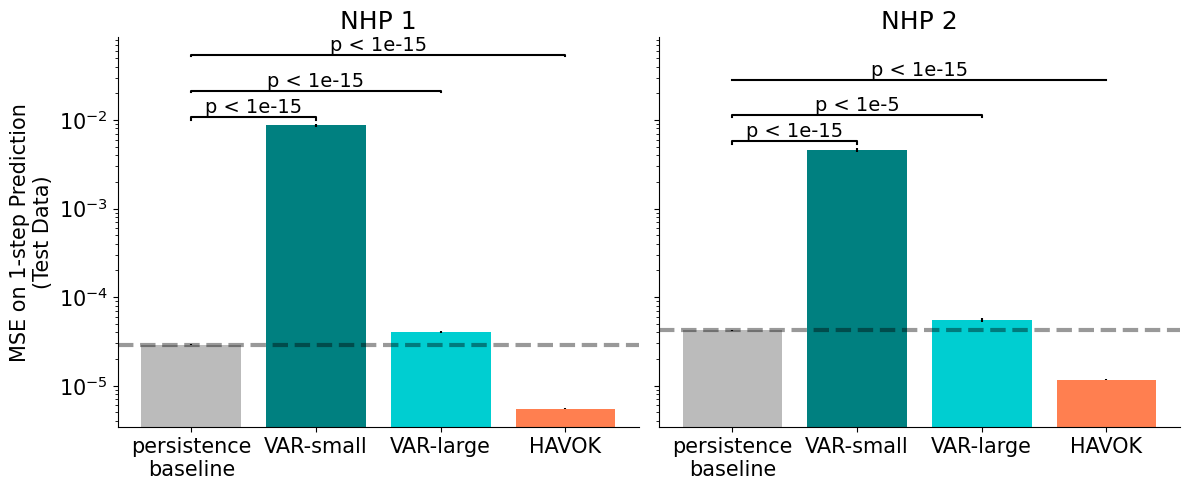

In [25]:
tick_fontsize = 15
title_fontsize = 18
ylabel_fontsize = 15
p_fontsize=14

fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
for i, session in enumerate(session_list):
    for j, area in enumerate(['all']):
        ax = axs[i]
        mean_vals = [rets[session][area].mse_1step_pb.mean(), rets[session][area].mse_1step_500.mean(), rets[session][area].mse_1step.mean(), rets[session][area].mse_1step_havok.mean()]
        se_vals = [rets[session][area].mse_1step_pb.std()/np.sqrt(len(rets[session][area])), rets[session][area].mse_1step_500.std()/np.sqrt(len(rets[session][area])), rets[session][area].mse_1step.std()/np.sqrt(len(rets[session][area])), rets[session][area].mse_1step_havok.std()/np.sqrt(len(rets[session][area]))]
        bar_labels = ['persistence\nbaseline', 'VAR-small', 'VAR-large', 'HAVOK']
        bars = [0, 1, 2, 3]
        heights = np.array(mean_vals)
        ax.bar(bars, heights, yerr=se_vals, color=model_colors)
        ax.set_xticks(bars)
        ax.set_xticklabels(bar_labels)
        ax.set_yscale('log')
        
        ax.spines[['right', 'top']].set_visible(False)
        ax.xaxis.set_ticks_position('bottom')
        
        if j == 0:
            ax.set_title(f"NHP {i + 1}", fontsize=title_fontsize)
            
        if i == 0:
            ax.set_ylabel(f"MSE on 1-step Prediction\n(Test Data)", fontsize=ylabel_fontsize)
        ax.tick_params(labelsize=tick_fontsize)
    
        ax = axs[i]
        dh = 0.1
        gap = 0.6
        barh = 0.1
        p = scipy.stats.ttest_ind(rets[session][area].mse_1step_pb, rets[session][area].mse_1step_500, alternative='less').pvalue
        barplot_annotate_brackets(0, 1, p, bars, heights, yerr=se_vals, scale_by_height=True, ax=ax, it=0, dh=dh, barh=barh, gap=gap, fs=p_fontsize)
        p = scipy.stats.ttest_ind(rets[session][area].mse_1step_pb, rets[session][area].mse_1step, alternative='less').pvalue
        barplot_annotate_brackets(0, 2, p, bars, heights, yerr=se_vals, scale_by_height=True, ax=ax, it=1, dh=dh, barh=barh, gap=gap, fs=p_fontsize)
        p = scipy.stats.ttest_ind(rets[session][area].mse_1step_pb, rets[session][area].mse_1step_havok, alternative='greater').pvalue
        barplot_annotate_brackets(0, 3, p, bars, heights, yerr=se_vals, scale_by_height=True, ax=ax, it=2, dh=dh, barh=barh, gap=gap, fs=p_fontsize)
        
        ax.axhline(rets[session][area].mse_1step_pb.mean(), linestyle='--', c='k', linewidth=3, alpha=0.4)
        
plt.tight_layout()
plt.savefig(os.path.join(img_save_dir, "SI", "mse-prediction.pdf"), bbox_inches='tight', transparent=True)
plt.show()

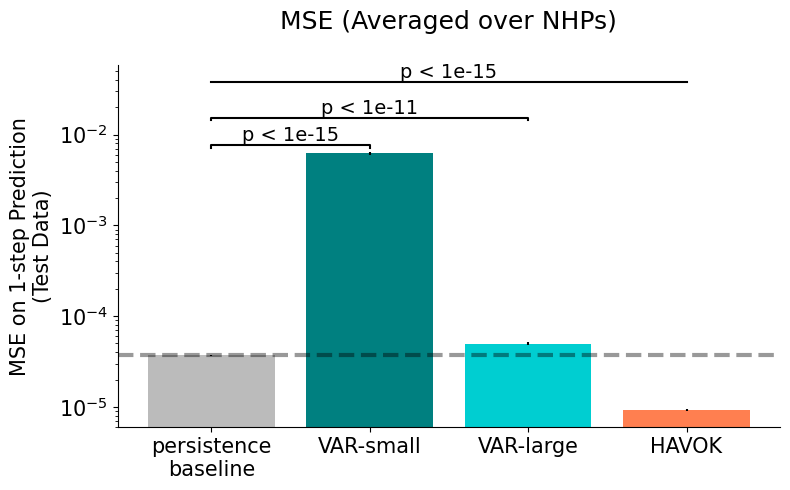

In [23]:
tick_fontsize = 15
title_fontsize = 18
ylabel_fontsize = 15
p_fontsize=14

fig, axs = plt.subplots(1, 1, figsize=(8, 5), sharey=True)
for j, area in enumerate(['all']):
    ax = axs
    pb_all = np.hstack([rets[session][area].mse_1step_pb for session in session_list])
    var500_all = np.hstack([rets[session][area].mse_1step_500 for session in session_list])
    varfull_all = np.hstack([rets[session][area].mse_1step for session in session_list])
    havok_all = np.hstack([rets[session][area].mse_1step_havok for session in session_list])
    mean_vals = [pb_all.mean(), var500_all.mean(), varfull_all.mean(), havok_all.mean()]
    se_vals = [pb_all.std()/np.sqrt(len(pb_all)), var500_all.std()/np.sqrt(len(var500_all)), varfull_all.std()/np.sqrt(len(varfull_all)), havok_all.std()/np.sqrt(len(havok_all))]
    bar_labels = ['persistence\nbaseline', 'VAR-small', 'VAR-large', 'HAVOK']
    bars = [0, 1, 2, 3]
    heights = np.array(mean_vals)
    ax.bar(bars, heights, yerr=se_vals, color=model_colors)
    ax.set_xticks(bars)
    ax.set_xticklabels(bar_labels)
    ax.set_yscale('log')

    ax.spines[['right', 'top']].set_visible(False)
    ax.xaxis.set_ticks_position('bottom')

    if j == 0:
        ax.set_title(f"MSE (Averaged over NHPs)\n", fontsize=title_fontsize)

    ax.set_ylabel(f"MSE on 1-step Prediction\n(Test Data)", fontsize=ylabel_fontsize)
    ax.tick_params(labelsize=tick_fontsize)

    ax = axs
    dh = 0.1
    gap = 0.6
    barh = 0.1
    p = scipy.stats.ttest_ind(pb_all, var500_all, alternative='less').pvalue
    barplot_annotate_brackets(0, 1, p, bars, heights, yerr=se_vals, scale_by_height=True, ax=ax, it=0, dh=dh, barh=barh, gap=gap, fs=p_fontsize)
    p = scipy.stats.ttest_ind(pb_all, varfull_all, alternative='less').pvalue
    barplot_annotate_brackets(0, 2, p, bars, heights, yerr=se_vals, scale_by_height=True, ax=ax, it=1, dh=dh, barh=barh, gap=gap, fs=p_fontsize)
    p = scipy.stats.ttest_ind(pb_all, havok_all, alternative='greater').pvalue
    barplot_annotate_brackets(0, 3, p, bars, heights, yerr=se_vals, scale_by_height=True, ax=ax, it=2, dh=dh, barh=barh, gap=gap, fs=p_fontsize)

    ax.axhline(pb_all.mean(), linestyle='--', c='k', linewidth=3, alpha=0.4)
        
plt.tight_layout()
plt.savefig(os.path.join(img_save_dir, "main", "mse-prediction-avg.pdf"), bbox_inches='tight', transparent=True)
plt.show()

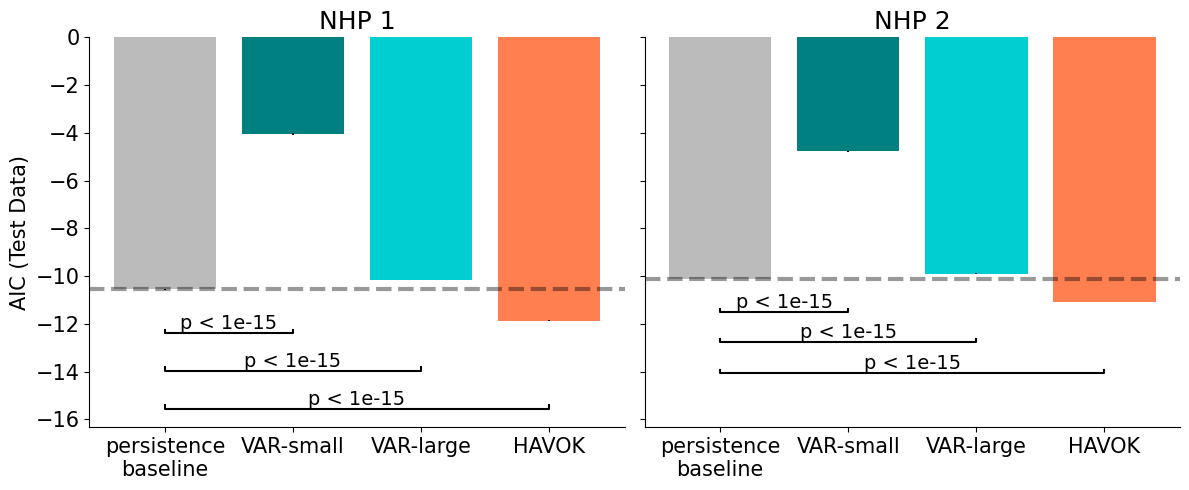

In [21]:
tick_fontsize = 15
title_fontsize = 18
ylabel_fontsize = 15
p_fontsize=14

fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
for i, session in enumerate(session_list):
    for j, area in enumerate(['all']):
        ax = axs[i]
        mean_vals = [rets[session][area].AIC_pb.mean(), rets[session][area].AIC_500.mean(), rets[session][area].AIC.mean(), rets[session][area].AIC_havok.mean()]
        se_vals = [rets[session][area].AIC_pb.std()/np.sqrt(len(rets[session][area])), rets[session][area].AIC_500.std()/np.sqrt(len(rets[session][area])), rets[session][area].AIC.std()/np.sqrt(len(rets[session][area])), rets[session][area].AIC_havok.std()/np.sqrt(len(rets[session][area]))]
        bar_labels = ['persistence\nbaseline', 'VAR-small', 'VAR-large', 'HAVOK']
        bars = [0, 1, 2, 3]
        heights = np.array(mean_vals)
        ax.bar(bars, heights, yerr=se_vals, color=model_colors)
        ax.set_xticks(bars)
        ax.set_xticklabels(bar_labels)
#         ax.set_yscale('log')
        
        ax.spines[['right', 'top']].set_visible(False)
        ax.xaxis.set_ticks_position('bottom')
        
        if j == 0:
            ax.set_title(f"NHP {i + 1}", fontsize=title_fontsize)
            
        if i == 0:
            ax.set_ylabel(f"AIC (Test Data)", fontsize=ylabel_fontsize)
        ax.tick_params(labelsize=tick_fontsize)
    
        ax = axs[i]
        dh = 0.05
        gap = 0.2
        barh = 0.02
        p = scipy.stats.ttest_ind(rets[session][area].AIC_pb, rets[session][area].AIC_500, alternative='less').pvalue
        barplot_annotate_brackets(0, 1, p, bars, heights, yerr=se_vals, scale_by_height=True, ax=ax, it=0, dh=dh, barh=barh, gap=gap, fs=p_fontsize, below=True)
        p = scipy.stats.ttest_ind(rets[session][area].AIC_pb, rets[session][area].AIC, alternative='less').pvalue
        barplot_annotate_brackets(0, 2, p, bars, heights, yerr=se_vals, scale_by_height=True, ax=ax, it=1, dh=dh, barh=barh, gap=gap, fs=p_fontsize, below=True)
        p = scipy.stats.ttest_ind(rets[session][area].AIC_pb, rets[session][area].AIC_havok, alternative='greater').pvalue
        barplot_annotate_brackets(0, 3, p, bars, heights, yerr=se_vals, scale_by_height=True, ax=ax, it=2, dh=dh, barh=barh, gap=gap, fs=p_fontsize, below=True)
        
        ax.axhline(rets[session][area].AIC_pb.mean(), linestyle='--', c='k', linewidth=3, alpha=0.4)
        
plt.tight_layout()
plt.savefig(os.path.join(img_save_dir, "SI", "aic-prediction.pdf"), bbox_inches='tight', transparent=True)
plt.show()

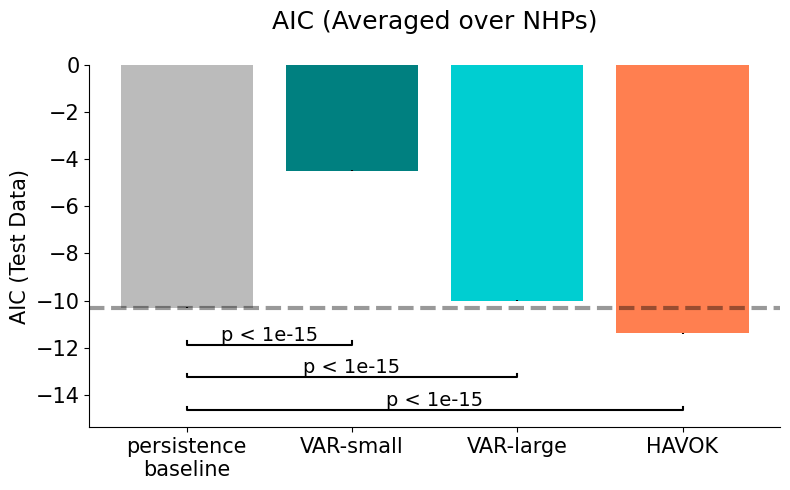

In [22]:
tick_fontsize = 15
title_fontsize = 18
ylabel_fontsize = 15
p_fontsize=14

fig, axs = plt.subplots(1, 1, figsize=(8, 5), sharey=True)
for j, area in enumerate(['all']):
    ax = axs
    pb_all = np.hstack([rets[session][area].AIC_pb for session in session_list])
    var500_all = np.hstack([rets[session][area].AIC_500 for session in session_list])
    varfull_all = np.hstack([rets[session][area].AIC for session in session_list])
    havok_all = np.hstack([rets[session][area].AIC_havok for session in session_list])
    mean_vals = [pb_all.mean(), var500_all.mean(), varfull_all.mean(), havok_all.mean()]
    se_vals = [pb_all.std()/np.sqrt(len(pb_all)), var500_all.std()/np.sqrt(len(var500_all)), varfull_all.std()/np.sqrt(len(varfull_all)), havok_all.std()/np.sqrt(len(havok_all))]
    bar_labels = ['persistence\nbaseline', 'VAR-small', 'VAR-large', 'HAVOK']
    bars = [0, 1, 2, 3]
    heights = np.array(mean_vals)
    ax.bar(bars, heights, yerr=se_vals, color=model_colors)
    ax.set_xticks(bars)
    ax.set_xticklabels(bar_labels)
    # ax.set_yscale('log')

    ax.spines[['right', 'top']].set_visible(False)
    ax.xaxis.set_ticks_position('bottom')

    if j == 0:
        ax.set_title(f"AIC (Averaged over NHPs)\n", fontsize=title_fontsize)

    ax.set_ylabel(f"AIC (Test Data)", fontsize=ylabel_fontsize)
    ax.tick_params(labelsize=tick_fontsize)

    ax = axs
    dh = 0.05
    gap = 0.2
    barh = 0.02
    p = scipy.stats.ttest_ind(pb_all, var500_all, alternative='less').pvalue
    barplot_annotate_brackets(0, 1, p, bars, heights, yerr=se_vals, scale_by_height=True, ax=ax, it=0, dh=dh, barh=barh, gap=gap, fs=p_fontsize, below=True)
    p = scipy.stats.ttest_ind(pb_all, varfull_all, alternative='less').pvalue
    barplot_annotate_brackets(0, 2, p, bars, heights, yerr=se_vals, scale_by_height=True, ax=ax, it=1, dh=dh, barh=barh, gap=gap, fs=p_fontsize, below=True)
    p = scipy.stats.ttest_ind(pb_all, havok_all, alternative='greater').pvalue
    barplot_annotate_brackets(0, 3, p, bars, heights, yerr=se_vals, scale_by_height=True, ax=ax, it=2, dh=dh, barh=barh, gap=gap, fs=p_fontsize, below=True)

    ax.axhline(pb_all.mean(), linestyle='--', c='k', linewidth=3, alpha=0.4)
        
plt.tight_layout()
plt.savefig(os.path.join(img_save_dir, "main", "aic-prediction-avg.pdf"), bbox_inches='tight', transparent=True)
plt.show()

In [33]:
pd.to_pickle(rets, os.path.join(data_save_dir, 'figure3_prediction_quality.pkl'))